# Threshold

In [ ]:
import zipfile

#extract the dataset from the zip file
with zipfile.ZipFile('/content/Threshold.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

In [ ]:
import os
import cv2
import numpy as np

image_dir = '/content/Threshold'

image_files = os.listdir(image_dir)

#sort the image files alphabetically
image_files.sort()

#create empty arrays for images (X) and labels (y)
X = []
y = []

#load images and labels
for filename in image_files:
    image_path = os.path.join(image_dir, filename)
    image = cv2.imread(image_path)
    if image is not None:
        image = cv2.resize(image, (240, 240)) 
        X.append(image)
        if 'thresholded_N' in filename:
            y.append(0)
        elif 'thresholded_Y' in filename:
            y.append(1)

#convert the lists to NumPy arrays
X = np.array(X)
y = np.array(y)
X = np.expand_dims(X, axis=-1) 

#print the shape of the arrays
print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (390, 240, 240, 3, 1)
y shape: (390,)


In [ ]:
from sklearn.utils import shuffle 
#shuffle the data
X, y = shuffle(X, y)

In [ ]:
from sklearn.model_selection import train_test_split
def split_data(X, y, test_size):

    X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=test_size)
    X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5)

    return X_train, y_train, X_val, y_val, X_test, y_test

In [ ]:
X_train, y_train, X_val, y_val, X_test, y_test = split_data(X, y, 0.2)

In [ ]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of validation examples = " + str(X_val.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))

number of training examples = 312
number of validation examples = 39
number of test examples = 39


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,Input,ZeroPadding2D,BatchNormalization,Flatten,Activation,Dense,MaxPooling2D,Dropout

In [ ]:
from keras.applications.vgg16 import VGG16, preprocess_input

IMG_WIDTH, IMG_HEIGHT = (240, 240)
IMG_SHAPE = (IMG_WIDTH, IMG_HEIGHT, 3)
vgg16_weight_path = 'imagenet'
vgg16_model = VGG16(
    weights=vgg16_weight_path,
    include_top=False,
    input_shape=IMG_SHAPE
)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import Adam, RMSprop

VGGmodel = Sequential()
VGGmodel.add(vgg16_model)
VGGmodel.add(layers.Flatten())
VGGmodel.add(layers.Dropout(0.5))
VGGmodel.add(layers.Dense(1, activation='sigmoid'))

VGGmodel.layers[0].trainable = False

VGGmodel.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(lr=1e-4),
    metrics=['accuracy']
)

VGGmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dropout (Dropout)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1)                 25089     
                                                                 
Total params: 14739777 (56.23 MB)
Trainable params: 25089 (98.00 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
VGGmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
VGGmodel.fit(x=X_train, y=y_train, batch_size=32, epochs=22, validation_data=(X_val, y_val))

Epoch 1/22
10/10 [==============================] - 281s 29s/step - loss: 4.6267 - accuracy: 0.6603 - val_loss: 3.6868 - val_accuracy: 0.6923
Epoch 2/22
10/10 [==============================] - 259s 26s/step - loss: 1.3231 - accuracy: 0.8782 - val_loss: 1.9719 - val_accuracy: 0.8974
Epoch 3/22
10/10 [==============================] - 251s 25s/step - loss: 0.7787 - accuracy: 0.9391 - val_loss: 1.4568 - val_accuracy: 0.8974
Epoch 4/22
10/10 [==============================] - 258s 26s/step - loss: 0.3060 - accuracy: 0.9776 - val_loss: 1.9733 - val_accuracy: 0.8462
Epoch 5/22
10/10 [==============================] - 257s 26s/step - loss: 0.2060 - accuracy: 0.9808 - val_loss: 1.7064 - val_accuracy: 0.9231
Epoch 6/22
10/10 [==============================] - 265s 27s/step - loss: 0.0199 - accuracy: 0.9968 - val_loss: 1.7205 - val_accuracy: 0.9231
Epoch 7/22
10/10 [==============================] - 258s 26s/step - loss: 0.1945 - accuracy: 0.9840 - val_loss: 2.0027 - val_accuracy: 0.8462
Epoch 

2/2 [==============================] - 26s 4s/step


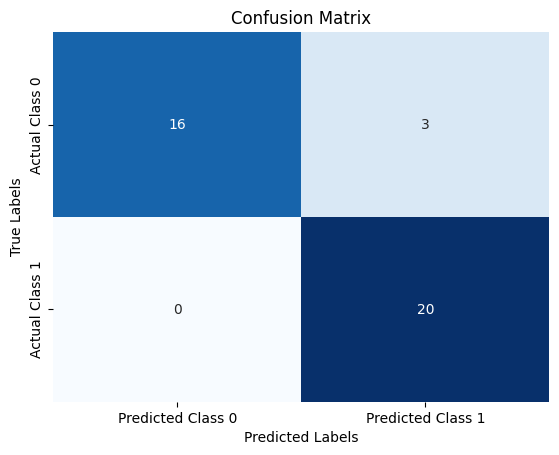


Predicted and Actual Values
Predicted class: [0] 	Actual class: 0
Predicted class: [1] 	Actual class: 1
Predicted class: [1] 	Actual class: 1
Predicted class: [1] 	Actual class: 1
Predicted class: [1] 	Actual class: 1
Predicted class: [1] 	Actual class: 1
Predicted class: [0] 	Actual class: 0
Predicted class: [0] 	Actual class: 0
Predicted class: [1] 	Actual class: 0
Predicted class: [1] 	Actual class: 1
Predicted class: [0] 	Actual class: 0
Predicted class: [0] 	Actual class: 0
Predicted class: [1] 	Actual class: 1
Predicted class: [1] 	Actual class: 1
Predicted class: [0] 	Actual class: 0
Predicted class: [0] 	Actual class: 0
Predicted class: [1] 	Actual class: 1
Predicted class: [1] 	Actual class: 1
Predicted class: [1] 	Actual class: 1
Predicted class: [1] 	Actual class: 1
Predicted class: [1] 	Actual class: 1
Predicted class: [1] 	Actual class: 1
Predicted class: [1] 	Actual class: 1
Predicted class: [1] 	Actual class: 1
Predicted class: [0] 	Actual class: 0
Predicted class: [0] 

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

y_pred = VGGmodel.predict(X_test)
threshold = 0.5
y_pred_binary = (y_pred >= threshold).astype(int)

#create a confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

#convert the confusion matrix to a pandas DataFrame
cm_df = pd.DataFrame(cm, index=['Actual Class 0', 'Actual Class 1'], columns=['Predicted Class 0', 'Predicted Class 1'])

#plot the confusion matrix using seaborn
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
print('')

#print the predicted class and the actual class
print('Predicted and Actual Values')
for i in range(len(y_test)):
    print('Predicted class:', y_pred_binary[i], '\tActual class:', y_test[i])

score = VGGmodel.evaluate(X_test, y_test, verbose=0)

#print test accuracy
print('\n', 'Test accuracy:', score[1])
print('\n', 'Test loss:', score[0])

# Contrast Stretching and Segmentation

In [1]:
import zipfile

#extract the dataset from the zip file
with zipfile.ZipFile('/content/contrast_stretch_segmentation.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

In [2]:
import os
import cv2
import numpy as np

image_dir = '/content/contrast_stretch_segmentation'

image_files = os.listdir(image_dir)

#sort the image files alphabetically
image_files.sort()

#create empty arrays for images (X) and labels (y)
X = []
y = []

#load images and labels
for filename in image_files:
    image_path = os.path.join(image_dir, filename)
    image = cv2.imread(image_path)
    if image is not None:
        image = cv2.resize(image, (240, 240))  
        X.append(image)
        if 'cont_stretching_segmentationN' in filename:
            y.append(0)
        elif 'cont_stretching_segmentationY' in filename:
            y.append(1)

#convert the lists to NumPy arrays
X = np.array(X)
y = np.array(y)
X = np.expand_dims(X, axis=-1)  

#print the shape of the arrays
print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (390, 240, 240, 3, 1)
y shape: (390,)


In [3]:
from sklearn.utils import shuffle 
#shuffle the data
X, y = shuffle(X, y)

In [4]:
from sklearn.model_selection import train_test_split
def split_data(X, y, test_size):

    X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=test_size)
    X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5)

    return X_train, y_train, X_val, y_val, X_test, y_test

In [5]:
X_train, y_train, X_val, y_val, X_test, y_test = split_data(X, y, 0.2)

In [6]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of validation examples = " + str(X_val.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))

number of training examples = 312
number of validation examples = 39
number of test examples = 39


In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,Input,ZeroPadding2D,BatchNormalization,Flatten,Activation,Dense,MaxPooling2D,Dropout

In [8]:
from keras.applications.vgg16 import VGG16, preprocess_input

IMG_WIDTH, IMG_HEIGHT = (240, 240)
IMG_SHAPE = (IMG_WIDTH, IMG_HEIGHT, 3)
vgg16_weight_path = 'imagenet'
vgg16_model = VGG16(
    weights=vgg16_weight_path,
    include_top=False,
    input_shape=IMG_SHAPE
)

58889256/58889256 [==============================] - 3s 0us/step


In [10]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import Adam, RMSprop

VGGmodel2 = Sequential()
VGGmodel2.add(vgg16_model)
VGGmodel2.add(layers.Flatten())
VGGmodel2.add(layers.Dropout(0.5))
VGGmodel2.add(layers.Dense(1, activation='sigmoid'))

VGGmodel2.layers[0].trainable = False

VGGmodel2.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(learning_rate=1e-4),
    metrics=['accuracy']
)

VGGmodel2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dropout_1 (Dropout)         (None, 25088)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                 25089     
                                                                 
Total params: 14739777 (56.23 MB)
Trainable params: 25089 (98.00 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [11]:
VGGmodel2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
VGGmodel2.fit(x=X_train, y=y_train, batch_size=32, epochs=22, validation_data=(X_val, y_val))

Epoch 1/22
10/10 [==============================] - 269s 27s/step - loss: 3.2919 - accuracy: 0.8109 - val_loss: 2.6462 - val_accuracy: 0.8205
Epoch 2/22
10/10 [==============================] - 259s 26s/step - loss: 1.2829 - accuracy: 0.9071 - val_loss: 3.5339 - val_accuracy: 0.7692
Epoch 3/22
10/10 [==============================] - 267s 27s/step - loss: 0.5345 - accuracy: 0.9519 - val_loss: 6.2421 - val_accuracy: 0.8462
Epoch 4/22
10/10 [==============================] - 263s 26s/step - loss: 0.4059 - accuracy: 0.9712 - val_loss: 3.3258 - val_accuracy: 0.8462
Epoch 5/22
10/10 [==============================] - 261s 27s/step - loss: 0.2013 - accuracy: 0.9776 - val_loss: 3.0347 - val_accuracy: 0.8718
Epoch 6/22
10/10 [==============================] - 262s 26s/step - loss: 0.0742 - accuracy: 0.9904 - val_loss: 3.7109 - val_accuracy: 0.8718
Epoch 7/22
10/10 [==============================] - 258s 26s/step - loss: 0.1557 - accuracy: 0.9872 - val_loss: 3.7063 - val_accuracy: 0.7949
Epoch 

2/2 [==============================] - 65s 7s/step


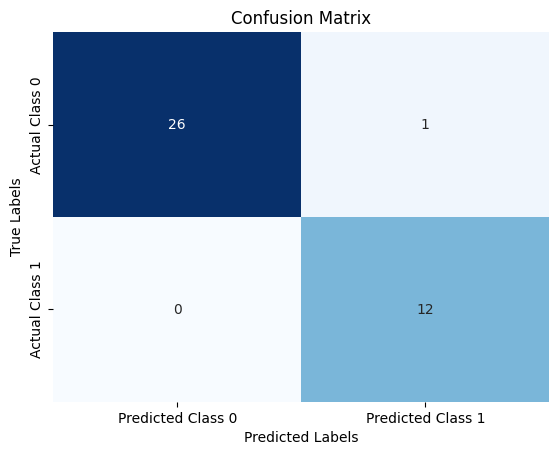


Predicted and Actual Values
Predicted class: [0] 	Actual class: 0
Predicted class: [0] 	Actual class: 0
Predicted class: [1] 	Actual class: 1
Predicted class: [0] 	Actual class: 0
Predicted class: [0] 	Actual class: 0
Predicted class: [0] 	Actual class: 0
Predicted class: [0] 	Actual class: 0
Predicted class: [0] 	Actual class: 0
Predicted class: [1] 	Actual class: 1
Predicted class: [1] 	Actual class: 1
Predicted class: [0] 	Actual class: 0
Predicted class: [1] 	Actual class: 1
Predicted class: [1] 	Actual class: 1
Predicted class: [0] 	Actual class: 0
Predicted class: [0] 	Actual class: 0
Predicted class: [0] 	Actual class: 0
Predicted class: [0] 	Actual class: 0
Predicted class: [0] 	Actual class: 0
Predicted class: [0] 	Actual class: 0
Predicted class: [1] 	Actual class: 1
Predicted class: [1] 	Actual class: 1
Predicted class: [1] 	Actual class: 1
Predicted class: [0] 	Actual class: 0
Predicted class: [0] 	Actual class: 0
Predicted class: [1] 	Actual class: 1
Predicted class: [0] 

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

y_pred = VGGmodel2.predict(X_test)
threshold = 0.5
y_pred_binary = (y_pred >= threshold).astype(int)

#create a confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

#convert the confusion matrix to a pandas DataFrame
cm_df = pd.DataFrame(cm, index=['Actual Class 0', 'Actual Class 1'], columns=['Predicted Class 0', 'Predicted Class 1'])

#plot the confusion matrix using seaborn
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
print('')

#print the predicted class and the actual class
print('Predicted and Actual Values')
for i in range(len(y_test)):
    print('Predicted class:', y_pred_binary[i], '\tActual class:', y_test[i])

score = VGGmodel2.evaluate(X_test, y_test, verbose=0)

#print test accuracy
print('\n', 'Test accuracy:', score[1])
print('\n', 'Test loss:', score[0])